Initial value: 850.0


<IPython.core.display.Javascript object>


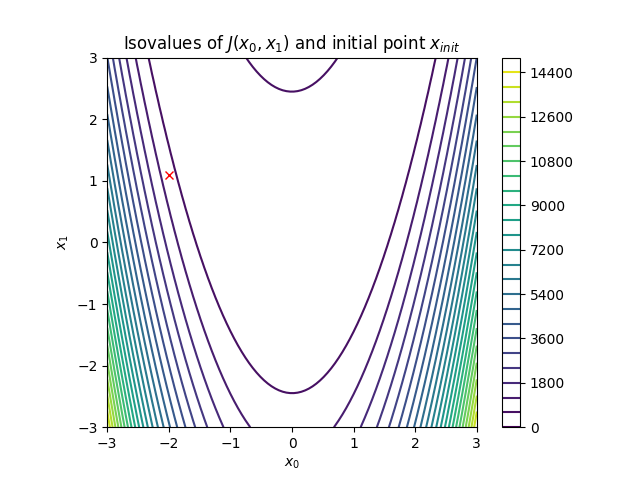

[-2326.  -580.]


In [332]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib notebook

x0 = np.array([-2,1.1])

mult = 1

m1 = 0.1
m2 = 0.9
Tol = 1e-16
Maxiter = 2000

variant = 1

def J(x):
    if variant==1:
        return 100*(x[1]-x[0]**2)**2+(1-x[0])**2
    if variant==2:
        return (x[1]**4+x[0]**4)
    if variant==3:
        return (x[1]**2+x[0]**2)**2
def GradJ(x):
    if variant==1:
        return np.array([200*(x[1]-x[0]**2)*(-2*x[0])-2*(1-x[0]),200*(x[1]-x[0]**2)])
    if variant==2:
        return np.array([4*x[0]**3,4*x[1]**3])
    if variant==3:
        return np.array([(x[1]**2+x[0]**2)*2*2*x[0],(x[1]**2+x[0]**2)*2*2*x[1]])
def Hess(x):
    if variant==1:
        return np.array([[2-400*x[1]+1200*x[0]**2,-400*x[0]],
                     [-400*x[0],200]])
    if variant==2:
        return np.array([[12*x[0]**2,0],
                     [0,12*x[1]**2]])
    if variant==3:
        return np.array([[8*x[0]**2+4*x[1]**2,8*x[0]*x[1]],
                     [8*x[0]*x[1],8*x[1]**2+4*x[0]**2]])

if variant==1:
    analytic = [1,1]
if variant==2:
    analytic = [0,0]
if variant==3:
    analytic = [0,0]
print("Initial value:",J(x0))

plt.figure()
xmin=min(-2,x0[0])-1
xmax=max(2,x0[0])+1
ymin=min(-2,x0[1])-1
ymax=max(2,x0[1])+1
aX0=np.linspace(xmin,xmax,100)
aX1=np.linspace(ymin,ymax,100)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,25)#(np.linspace(0,30,10)**2))
plt.plot(x0[0],x0[1],'rx')
plt.axis('scaled')
plt.colorbar()
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Isovalues of $J(x_0,x_1)$ and initial point $x_{init}$')
plt.show()

print(GradJ(x0))

In [333]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2):
  Newton=1
  phist = []
  vhist = []
  ghist = []
  phist.append(x0)            # Create an array which holds the optimization history
 
  val = f(x0)
  gd   = df(x0)
  vhist.append(val)
  ghist.append(gd)
  iter = 1
  step = 0.1
  prevval = val
  H = Hess(x0)
  print(H)
  Hinv = np.linalg.inv(H)
  v = np.linalg.eigvals(H)  
  print("Eigenvalues: ",v)
  d = gd
  while abs(np.linalg.norm(gd))>=Tol: 
    #Line search
    tl=0
    tr=0
    t=1
    step=t
    # choice of the descent direction  
    if Newton==1:
        H = Hess(x0)#np.array([[-400*(x0[1]-3*x0[0]**2)+2, -400*x0[0]],[-400*x0[1], 200]])
        Hinv = np.linalg.inv(H)
        d = -mult*Hinv@gd
    else:
        d = -gd
    

    #np.sqrt(abs((f(x0+step*d,v)-val)))/step<np.sqrt(abs(-(m1*(d*d))))
    while (1==1):
        qt = f(x0+t*d)
        qp = np.dot(gd,d)
        #print(tl," ",tr)
        if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
            step=t   # we found a good step
            break
        if ((qt-val)/t>(m1*qp)):
            # step too big
            tr = t
        if ((qt-val)/t<(m2*qp)):
            # step too small
            tl = t
        if(tr==0):
            t = 2*tl
        else:
            t = 0.5*(tl+tr)
        if abs(tr-tl)<1e-15*tr or tr<1e-15:
            break
            
    x0 = x0+step*(d)
    val = f(x0)
    gd   = df(x0)
    if(iter%10==0):
          print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
    phist.append(x0)
    vhist.append(val)
    ghist.append(d)
    iter=iter+1
    if(iter>maxiter):
        print('Maximum number of iterations reached!')
        break
    #if(abs(val-prevval)<Tol):
        #print('Function does not decrease enough!')
        #break
    prevval = val
  if(np.linalg.norm(d)<Tol): 
    print('Algorithm converged!')
  print('')
  print('Final output:')
  print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",abs(gd))
  return phist,vhist,ghist

In [334]:
pp,vv,gg = GDlinesearch(J,GradJ,x0,Tol,Maxiter,m1,m2)

print('Number of iterations: ',len(pp))
print('Final position: ',pp[-1])
print('Difference to analytical sol: ',np.linalg.norm(analytic-pp[-1]))



[[4362.  800.]
 [ 800.  200.]]
Eigenvalues:  [4510.47549886   51.52450114]
Iter:  10 | Val:  1.6350483973544314 | Step:  1  Grad:  [5.28339868 5.64143663]
Iter:  20 | Val:  0.00840298202520003 | Step:  1  Grad:  [1.46880153 0.88575027]

Final output:
Iter:  28 | Val:  0.0 | Step:  1  Grad:  [0. 0.]
Number of iterations:  28
Final position:  [1. 1.]
Difference to analytical sol:  0.0


<IPython.core.display.Javascript object>


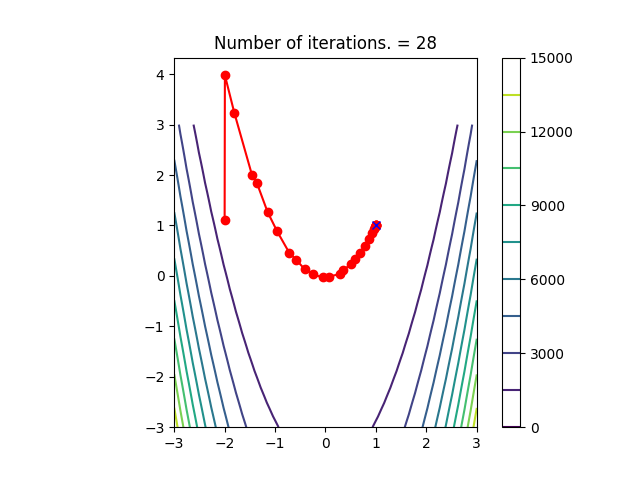

[850.0, 8.969045665807553, 8.008863342243517, 7.593504569271952, 5.580091948488601, 4.882665693208724, 3.965531628379124, 3.2876012325090245, 2.5370691975415505, 2.1404845626206463, 1.6350483973544314, 1.2466914125047366, 0.890851429461923, 0.705306426505302, 0.41948056436978315, 0.3107563998801548, 0.17481793350119612, 0.11680791480232097, 0.059318761268452064, 0.025188954014487168, 0.00840298202520003, 0.001749309465948301, 0.00015915576981495274, 2.3443764400161335e-06, 6.892758514977851e-10, 6.197484064265118e-17, 3.0814879110195774e-31, 0.0]


In [335]:
plt.figure()
print(vv)
aX0=np.linspace(xmin,xmax)
aX1=np.linspace(ymin,ymax)
Z=np.array([[J(np.array([x0,x1])) for x0 in aX0] for x1 in aX1])
plt.contour(aX0,aX1,Z,12)

lx0=[X[0] for X in pp]
lx1=[X[1] for X in pp]
plt.plot(lx0,lx1,"-ro")

plt.plot(analytic[0],analytic[1],'-bx')


plt.axis('scaled')
plt.title('Number of iterations. = '+str(np.shape(lx0)[0]))
plt.colorbar()


plt.show()

[3.0016662039607267, 4.224399118902487, 3.5903486628909156, 2.647430669297653, 2.50629273459122, 2.1645291497095367, 1.9624493513102266, 1.8018760588927238, 1.7218487409771084, 1.658457422079235, 1.5782186807903138, 1.4787868649237108, 1.3730430388033952, 1.2037511332432203, 1.0910186963227388, 0.9129057487982674, 0.7805965482226088, 0.6384074624771537, 0.46566344312579266, 0.3144664357743189, 0.17766778443237127, 0.08464562894230632, 0.023014864487614403, 0.003043656112229112, 4.58856781160989e-05, 1.5605990746637587e-08, 1.2412670766236366e-15, 0.0]


<IPython.core.display.Javascript object>


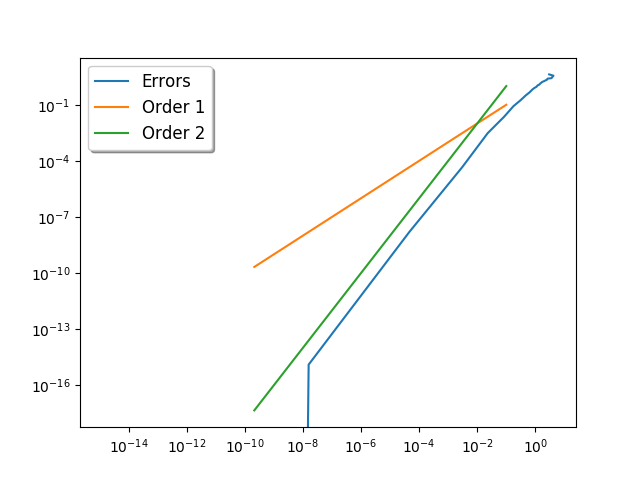

In [336]:
Niter = len(pp)
dis = np.linspace(1,Niter,Niter+1)

errors=[np.sqrt((X[0]-analytic[0])**2+(X[1]-analytic[1])**2) for X in pp]
print(errors)

if(dis.size>10):
    dis2 = dis[0:10]
else:
    dis2 = dis
sq  = 0.1**dis2
lam = 0.5*(1+np.sqrt(5))
sq2 = 100*sq**2
sq3 = 100*sq**3
sqlam = 100*sq**lam

plt.figure()
#fig, ax = plt.subplots()

plt.loglog(errors[:-1:],errors[1:],label='Errors')
plt.loglog(sq,sq,label='Order 1')

plt.loglog(sq,sq2,label='Order 2')
#plt.loglog(sq,sq3,label='Order 3')

plt.legend(loc='best', shadow=True, fontsize='large')
plt.show()